# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Оглавление
==========

*   [1  Откройте файл с данными и изучите общую информацию](#Откройте-файл-с-данными-и-изучите-общую-информацию)
    *   [1.1  Загрузим данные из csv-файла в датафрейм.](#Загрузим-данные-из-csv-файла-в-датафрейм.)
    *   [1.2  Изучим общую информацию о полученном датафрейме.](#Изучим-общую-информацию-о-полученном-датафрейме.)
    *   [1.3  Построим гистограмму для всех числовых столбцов таблицы на одном графике.](#Построим-гистограмму-для-всех-числовых-столбцов-таблицы-на-одном-графике.)
*   [2  Выполните предобработку данных](#Выполните-предобработку-данных)
    *   [2.1  Найдём и изучим пропущенные значения в столбцах.](#Найдём-и-изучим-пропущенные-значения-в-столбцах.)
        *   [2.1.1  Найдём и изучим пропущенные значения в столбцах.](#Найдём-и-изучим-пропущенные-значения-в-столбцах.)
    *   [2.2  Рассмотрим типы данных в каждом столбце.](#Рассмотрим-типы-данных-в-каждом-столбце.)
    *   [2.3  Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.](#Изучим-уникальные-значения-в-столбце-с-названиями-и-устраним-неявные-дубликаты.)
        *   [2.3.1  Избавимся от аномалий.](#Избавимся-от-аномалий.)
*   [3  Добавьте в таблицу новые столбцы](#Добавьте-в-таблицу-новые-столбцы)
    *   [3.1  Добавляем в таблицу новые столбцы со следующими параметрами:](#Добавляем-в-таблицу-новые-столбцы-со-следующими-параметрами:)
        *   [3.1.1  Цена одного квадратного метра.](#Цена-одного-квадратного-метра.)
        *   [3.1.2  День недели публикации объявления.](#День-недели-публикации-объявления.)
        *   [3.1.3  Месяц публикации объявления.](#Месяц-публикации-объявления.)
        *   [3.1.4  Год публикации объявления.](#Год-публикации-объявления.)
        *   [3.1.5  Тип этажа квартиры.](#Тип-этажа-квартиры.)
        *   [3.1.6  Расстояние до центра города в километрах.](#Расстояние-до-центра-города-в-километрах.)
*   [4  Проведите исследовательский анализ данных](#Проведите-исследовательский-анализ-данных)
    *   [4.1  Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров.](#Изучим-перечисленные-ниже-параметры-объектов-и-построим-отдельные-гистограммы-для-каждого-из-этих-параметров.)
        *   [4.1.1  Общая площадь квартир.](#Общая-площадь-квартир.)
        *   [4.1.2  Жилая площадь квартир.](#Жилая-площадь-квартир.)
        *   [4.1.3  Площадь кухни.](#Площадь-кухни.)
        *   [4.1.4  Цена объекта.](#Цена-объекта.)
        *   [4.1.5  Количество комнат.](#Количество-комнат.)
        *   [4.1.6  Высота потолков.](#Высота-потолков.)
        *   [4.1.7  Тип этажа квартиры («первый», «последний», «другой»).](#Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»).)
        *   [4.1.8  Общее количество этажей в доме.](#Общее-количество-этажей-в-доме.)
        *   [4.1.9  Расстояние до центра города в метрах.](#Расстояние-до-центра-города-в-метрах.)
        *   [4.1.10  Расстояние до ближайшего парка.](#Расстояние-до-ближайшего-парка.)
    *   [4.2  Изучим, как быстро продавались квартиры.](#Изучим,-как-быстро-продавались-квартиры.)
        *   [4.2.1  Построим гистограмму по быстроте продажи квартир.](#Построим-гистограмму-по-быстроте-продажи-квартир.)
        *   [4.2.2  Посчитаем среднее и медиану быстроты продажи квартир](#Посчитаем-среднее-и-медиану-быстроты-продажи-квартир)
    *   [4.3  Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.](#Определим-факторы,-которые-больше-всего-влияют-на-общую-(полную)-стоимость-объекта.)
        *   [4.3.1  Зависимость стоимости объекта от его общей площади.](#Зависимость-стоимости-объекта-от-его-общей-площади.)
        *   [4.3.2  Зависимость стоимости объекта от его жилой площади.](#Зависимость-стоимости-объекта-от-его-жилой-площади.)
        *   [4.3.3  Зависимость стоимости объекта от площади его кухни.](#Зависимость-стоимости-объекта-от-площади-его-кухни.)
        *   [4.3.4  Зависимость стоимости объекта от количества комнат в нём.](#Зависимость-стоимости-объекта-от-количества-комнат-в-нём.)
        *   [4.3.5  Зависимость стоимости объекта от этажа, на котором он расположен.](#Зависимость-стоимости-объекта-от-этажа,-на-котором-он-расположен.)
        *   [4.3.6  Зависимость стоимости объекта от даты размещения объявления о его продаже.](#Зависимость-стоимости-объекта-от-даты-размещения-объявления-о-его-продаже.)
            *   [4.3.6.1  Зависимость стоимости объекта от дня недели размещения объявления о его продаже.](#Зависимость-стоимости-объекта-от-дня-недели-размещения-объявления-о-его-продаже.)
            *   [4.3.6.2  Зависимость стоимости объекта от месяца размещения объявления о его продаже.](#Зависимость-стоимости-объекта-от-месяца-размещения-объявления-о-его-продаже.)
            *   [4.3.6.3  Зависимость стоимости объекта от года размещения объявления о его продаже.](#Зависимость-стоимости-объекта-от-года-размещения-объявления-о-его-продаже.)
    *   [4.4  Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.](#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.)
        *   [4.4.1  Постром сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.](#Постром-сводную-таблицу-с-количеством-объявлений-и-средней-ценой-квадратного-метра-для-этих-населенных-пунктов.)
        *   [4.4.2  Выделим среди них населённые пункты с самой высокой и низкой стоимостью квадратного метра жилья.](#Выделим-среди-них-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-квадратного-метра-жилья.)
    *   [4.5  Зависимость средней цены объекта от расстояния до центра Санкт-Петербурга.](#Зависимость-средней-цены-объекта-от-расстояния-до-центра-Санкт-Петербурга.)
        *   [4.5.1  Вычислим среднюю стоимость квартир на разном удалении от центра.](#Вычислим-среднюю-стоимость-квартир-на-разном-удалении-от-центра.)
        *   [4.5.2  Построим график изменения средней цены для каждого километра от центра Санкт-Петербурга.](#Построим-график-изменения-средней-цены-для-каждого-километра-от-центра-Санкт-Петербурга.)
*   [5  Напишите общий вывод](#Напишите-общий-вывод)

## Откройте файл с данными и изучите общую информацию

### Загрузим данные из csv-файла в датафрейм.

In [1]:
# импорт библиотеки pandas  
import pandas as pd

# импорт модуля pyplot из библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт модуля ticker из библиотеки matplotlib
import matplotlib.ticker as ticker

# импорт библиотеки seaborn
import seaborn as sns

# импорт библиотеки numpy
import numpy as np

In [2]:
# считывание данных из csv-файла real_estate_data.csv в датафрейм, используя в качестве разделителя 
# знак табуляции \t, и сохранение в переменную data 
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### Изучим общую информацию о полученном датафрейме.

In [3]:
# вывод первых 10 строк датафрейма data на экран с помощью функции pandas.head() с показом всех столбцов
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# вывод общей информации о датафрейме с помощью функции DataFrame.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построим гистограмму для всех числовых столбцов таблицы на одном графике.

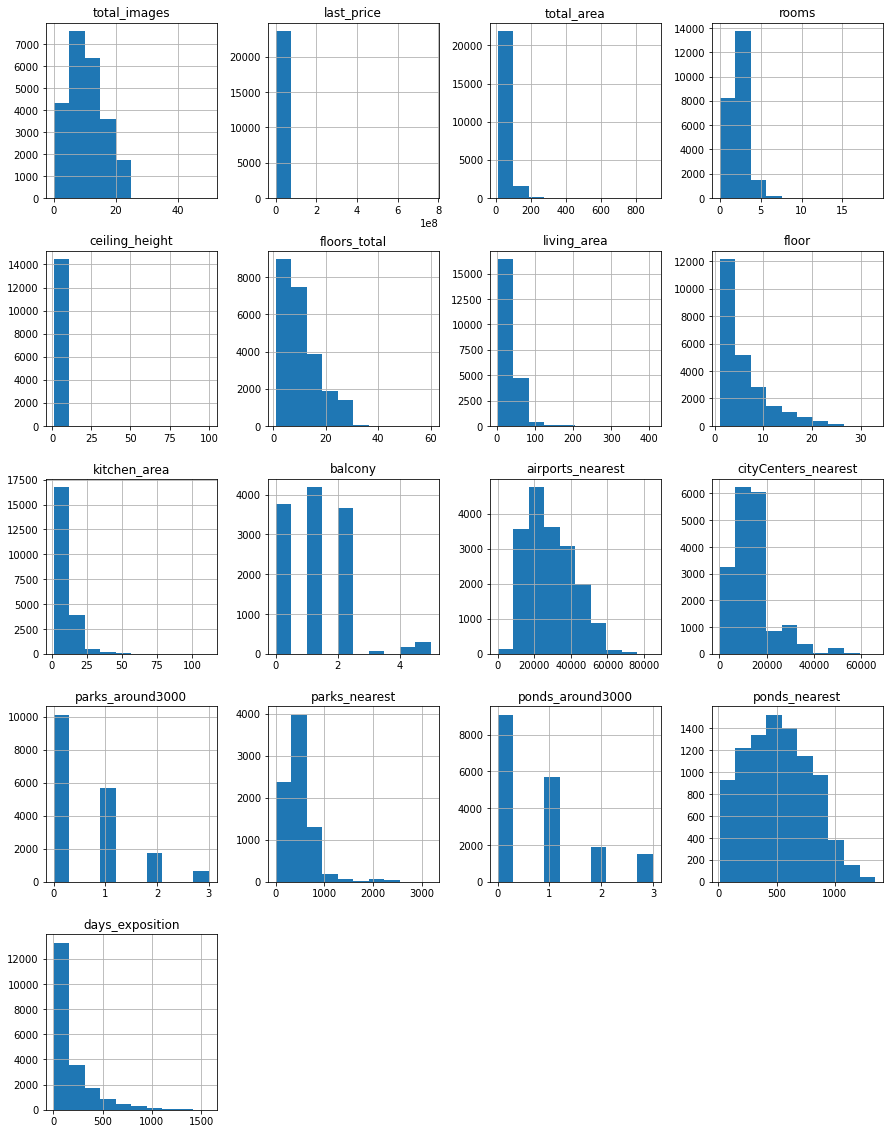

In [5]:
# построение гистограммы с использованием функции DataFrame.hist()
data.hist(figsize=(15, 20));

**Вывод:**

Всего в таблице 22 колонки и 23699 строки с булевыми, цельночисленными, вещественными, объектными типами данных. 

Согласно документации колонки содержат следующую информацию:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м),
- `balcony` — число балконов,
- `ceiling_height` — высота потолков (м),
- `cityCenters_nearest` — расстояние до центра города (м),
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия),
- `first_day_exposition` — дата публикации,
- `floor` — этаж,
- `floors_total` — всего этажей в доме,
- `is_apartment` — апартаменты (булев тип),
- `kitchen_area` — площадь кухни в квадратных метрах (м²),
- `last_price` — цена на момент снятия с публикации,
- `living_area` — жилая площадь в квадратных метрах (м²),
- `locality_name` — название населённого пункта,
- `open_plan` — свободная планировка (булев тип),
- `parks_around3000` — число парков в радиусе 3 км,
- `parks_nearest` — расстояние до ближайшего парка (м),
- `ponds_around3000` — число водоёмов в радиусе 3 км,
- `ponds_nearest` — расстояние до ближайшего водоёма (м),
- `rooms` — число комнат,
- `studio` — квартира-студия (булев тип),
- `total_area` — общая площадь квартиры в квадратных метрах (м²),
- `total_images` — число фотографий квартиры в объявлении.


[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

## Выполните предобработку данных

### Найдём и изучим пропущенные значения в столбцах.

Проверим названия колонок на соответствие хорошего стиля.

In [6]:
# вывод названий колонок с помощью атрибута .columns
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия части колонок (`'cityCenters_nearest'`, `'parks_around3000'`, `'ponds_around3000'`) не соответствуют правилам хорошего тона, переведём их в "змеинный" регистр.  

In [7]:
# переименование названия колонок методом rename 
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000',\
                           'ponds_around3000' : 'ponds_around_3000'})

Убедимся, что все названия колонок написаны по правилам хорошего тона. 

In [8]:
# вывод названий колонок с помощью атрибута .columns
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь все имена колонок соответствую хорошему стилю написания.

#### Найдём и изучим пропущенные значения в столбцах.

Определим, в каких столбцах есть пропуски.

In [9]:
# определение столбцов с помощью функции dataframe.isna () и сложение методом sum(), 
# вычисление доли функцией mean() с конкатенацией по столбцам и их последующим перименованием   
pd.concat([data.isna().sum(),data.isna().mean().apply(lambda x: '{0:.1f}%'.format(x*100))], axis=1)\
.rename(columns={0:'кол-во пропусков', 1:'доля пропусков'})


,кол-во пропусков,доля пропусков
total_images,0,0.0%
last_price,0,0.0%
total_area,0,0.0%
first_day_exposition,0,0.0%
rooms,0,0.0%
ceiling_height,9195,38.8%
floors_total,86,0.4%
living_area,1903,8.0%
floor,0,0.0%
is_apartment,20924,88.3%


Пропуски данных обнаружены в следующих 14-ти из 22-ух колонках:
1. `ceiling_height` - 9195 (38.8%) пропусков, значительное число, заменим медианными значениями; 
2. `floors_total` - 86 (0.4%) пропусков, число незначительное, удаляем;  
3. `living_area` - 1903 (8.0%) пропусков, число малозначительное, заполним средним значением с соответствующей общей площади;  
4. `is_apartment` - 20924 (88.3%) пропусков, заменим на False, т.к. скорее всего это не аппартаменты.  
5. `kitchen_area` - 2278 (9.6%) пропусков, число малозначительное, заполним средним значением с соответствующей общей площади;
6. `balcony` - 11519 (48.6%) пропусков, число балконов заменим на 0, т.к. скорее всего их в квартире нет;
7. `locality_name` - 49 (0.2%) пропусков, число незначительное, удаляем;
8. `airports_nearest` - 5542 (23.4%) пропусков, число существенное, оставим как есть, т.к. требуются дополнительные картографические данные;   
9. `city_centers_nearest` - 5519 (23.3%) пропусков,число существенное, оставим как есть, т.к. требуются дополнительные картографические данные;    
10. `parks_around_3000` - 5518 (23.3%) пропусков,число существенное, оставим как есть, т.к. требуются дополнительные картографические данные;    
11. `parks_nearest`- 15620 (65.9%) пропусков, число значительное, оставим как есть, т.к. требуются дополнительные картографические данные;   
12. `ponds_around_3000` - 5518 (23.3%) пропусков, число существенное, оставим как есть, т.к. требуются дополнительные картографические данные;   
13. `ponds_nearest` - 14589 (61.6%) пропусков,число значительное, оставим как есть, т.к. требуются дополнительные картографические данные;    
14. `days_exposition` - 3181 (13.4%) пропусков, число малозначительное, но может оказать влияние на выборку и возможно это свежие объявления (менее 1 дня), поэтому оставим как есть.

Меняем пропуски в столбце `ceiling_height` на медианные значения.

In [10]:
# замена пропусков на медианные значения методом fillna 
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Меняем пропуски в столбце `living_area` на среднее значением с соответствующей общей площадью.

In [11]:
# замена пропусков на соответствующие средние значения методом fillna
data['living_area'].fillna(data['total_area']/(data['total_area'].mean()/data['living_area'].mean()), inplace=True)

Меняем пропуски в столбце `kitchen_area` на среднее значением с соответствующей общей площадью.

In [12]:
# замена пропусков на соответствующие средние значения методом fillna
data['kitchen_area'].fillna(data['total_area']/(data['total_area'].mean()/data['kitchen_area'].mean()), inplace=True)

Меняем пропуски в столбце `balcony` на 0.

In [13]:
# замена пропусков на нулевые значения методом fillna
data['balcony'].fillna(0, inplace=True)

Меняем пропуски в столбце `is_apartment` на `False`.

In [14]:
# замена пропусков на False методом fillna
data['is_apartment'].fillna(False, inplace=True)

Удаляем записи с отстутствием числа этажей.

In [15]:
# удаление записей методом dropna
data.dropna(subset=['floors_total'], inplace=True)

Удаляем записи с отстутствием названия населенного пункта.

In [16]:
# удаление записей методом dropna
data.dropna(subset=['locality_name'], inplace=True)

Проверяем, если пропущенные значения в рассматриваемых столбцах.

In [17]:
# проверка наличие пропущенных значений с помощью функций isna() и sum()
data[['ceiling_height', 'balcony', 'is_apartment', 'floors_total', 'locality_name']].isna().sum()

ceiling_height    0
balcony           0
is_apartment      0
floors_total      0
locality_name     0
dtype: int64

Пропущенные значения в рассматриваемых столбцах отсутствуют. 

**Вывод:**

В тех столбцах, которые заполнялись пользователем, пропуски могли образоваться и по:
- техническим (сбой, баги в программном обеспечении, повреждение базы данных вирусом, дефектный носитель),
- организационным (отсутствие единого регламента внесения данных, их обработки, транспортировки, хранения; внесение данных из разных форм (офис, приложение, сайт), где отсутствует одна из граф), 

так и по человеческим причинам:

   - `ceiling_height`, `living_area`, `kitchen_area` - пользователь мог не знать данную информацию,
   - `floors_total`,`is_apartment`,`locality_name` - пользователь мог пропустить сознательно, чтобы например скрыть первый, последний этаж, факт апартаментов (по документам, - это нежилые пoмeщeния, в кoтopыx coздaны ycлoвия для проживания), неблагополучный населенный пункт, чтобы не отпугивать покупателя,
   - `balcony`, `is_apartment` - пропуск также может означать отсутствие данной опции,
   - `days_exposition` - объявление могло быть добавлено в этот же день.

В тех же столбцах, которые заполнялись автоматическим путём из картографических данных (пп.8-13) пропуски могли образоваться по техническим, программным, организационным причинам, но также и человеческим (ошибки, усталость, халатность, необученность специалистов). 
 

### Рассмотрим типы данных в каждом столбце.

Найдём столбцы, в которых нужно изменить тип данных.

In [18]:
# выведем тип данных в каждой колонке с помощью функции dtypes
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Необходимо заменить типы данных в следующих столбцах для последующего проведения арифметических и логических операций над ними:

- 'last_price':  `float64` на `int64`,
- 'first_day_exposition':  `object` на `datetime`,  
- 'floors_total':  `float64` на `int64`,
- 'is_apartment':  `object` на `boolean`,
- 'balcony': `float64` на `int64`.

Преобразуем тип данных в выбранных столбцах.

In [19]:
# преобразование типа данных методом astype 
data[['last_price', 'floors_total', 'balcony']] = data[['last_price', 'floors_total', 'balcony']]\
.apply(lambda x: x.astype('int64'))

In [20]:
# преобразование типа данных с помощью функции pandas.to_datetime() 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
# преобразование типа данных методом astype 
data['is_apartment'] = data['is_apartment'].astype('boolean')

Проверим изменение типов данных.

In [22]:
# вывод типов данных для столбцов
data[['last_price', 'first_day_exposition', 'floors_total', 'is_apartment', 'balcony',]].dtypes

last_price                       int64
first_day_exposition    datetime64[ns]
floors_total                     int64
is_apartment                   boolean
balcony                          int64
dtype: object

Замена типов данных прошла успешно.

Проверим данные на явные дубликаты.

In [23]:
# проверка числа явных дубликатов с помощью функций duplicated() и sum()  
data.duplicated().sum()

0

Явных дубликатов не выявлено.

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 

Посчитаем уникальные значения в столбце с названиями.

In [24]:
# вычисление числа уникальных значений в столбце с названиями с помощью функции nunique()  
implicit_duplicates = data['locality_name'].nunique()
print(f'Число уникальных значений в столбце с названиями: {implicit_duplicates}.')

Число уникальных значений в столбце с названиями: 364.


Выведем список всех уникальных значений в столбце с названиями.

In [25]:
# вывод и сортировка всех уникальных значений в столбце с названиями с помощью функций sort_values() и unique()    
list(data['locality_name'].sort_values().unique())


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Добавляем новый столбец `locality_rename` с удаленными неявными дубликатами.


In [26]:
# создание столбца locality_rename с удаленными неявными дубликатами 
data['locality_rename'] = (data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок'], 'поселок', regex=True)
                           .replace('деревня', 'село', regex=True).str.lower()
)

Посчитаем уникальные значения во вновь созданном столбце с названиями.

In [27]:
# вычисление числа уникальных значений в столбце с названиями с помощью функции nunique()  
implicit_duplicates_renew = data['locality_rename'].nunique()
print(f'Число уникальных значений в столбце с названиями после удаления неявных дубликатов:\
{implicit_duplicates_renew}.')

Число уникальных значений в столбце с названиями после удаления неявных дубликатов:321.


Выведем список всех уникальных значений в новом столбце с названиями.

In [28]:
# вывод список уникальных значений в новом столбце с названиями с помощью функций sort_values() и unique()  
list(data['locality_rename'].sort_values().unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'зеленогорск',
 'ивангород',
 'каменногорск',
 'кингисепп',
 'кириши',
 'кировск',
 'колпино',
 'коммунар',
 'красное село',
 'кронштадт',
 'кудрово',
 'лодейное поле',
 'ломоносов',
 'луга',
 'любань',
 'мурино',
 'никольское',
 'новая ладога',
 'отрадное',
 'павловск',
 'петергоф',
 'пикалево',
 'подпорожье',
 'поселок александровская',
 'поселок алексеевка',
 'поселок аннино',
 'поселок барышево',
 'поселок белоостров',
 'поселок большая ижора',
 'поселок бугры',
 'поселок будогощь',
 'поселок важины',
 'поселок виллози',
 'поселок вознесенье',
 'поселок возрождение',
 'поселок войсковицы',
 'поселок войскорово',
 'поселок володарское',
 'поселок вырица',
 'поселок высокоключевой',
 'поселок гаврилово',
 'поселок гарболово',
 'поселок гладкое',
 'поселок глажево',
 'поселок глебычево',
 'поселок гончарово',
 'поселок громово',
 'поселок дзержинского',
 'поселок дружная горка',
 'поселок дружно

#### Избавимся от аномалий.

Проанализируем значения высоты потолков, стоимости, количества комнат и общей площади объектов. 

In [29]:
# вывод отсортированных значений высоты потолков с помощью функции sort_values()
data['ceiling_height'].sort_values()

22590      1.00
5712       1.20
16934      1.75
20520      2.00
16884      2.00
          ...  
20478     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23565, dtype: float64

Вряд ли высота потолков может быть менее 1,5 и более 7 метров.

In [30]:
# вывод отсортированных значений стоимости объекта с помощью функции sort_values()
data['last_price'].sort_values()

8793         12190
17456       430000
14911       430000
16274       440000
9581        450000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23565, dtype: int64

Цены 12 тысяч и 763 млн. сомнительны. 

In [31]:
# вывод отсортированных значений числа комнат с помощью функции sort_values()
data['rooms'].sort_values()

1625      0
6225      0
19154     0
23554     0
20584     0
         ..
866      14
20829    14
5358     15
18848    16
14498    19
Name: rooms, Length: 23565, dtype: int64

Наличие квартир с более чем 10 комнатами вызывает большие сомнения.

In [32]:
# вывод отсортированных значений общей площади с помощью функции sort_values()
data['total_area'].sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23565, dtype: float64

Более 300 кв.м. слишком большая площадь для квартиры, а менее 20 - слишком маленькая.

**Исправим аномалии.**

Перенесём запятую на один разряд вперёд в аномально больших значениях высоты потолка.

In [33]:
# деление на 10 значений высоты потолков более 14.0 м
data.loc[data['ceiling_height']>=14.0, ['ceiling_height']] = data['ceiling_height']/10

Избавим данные от выявленных аномалий.  

In [34]:
# создание нового датасета путем поэтапного среза данных с помощью функции query()
data_new = data.query('ceiling_height >= 1.5 & ceiling_height <=7')
data_new = data_new.query('last_price > 50000 & last_price <= 763000000')
data_new = data_new.query('rooms <= 10')
data_new = data_new.query('total_area >= 20 & total_area <= 300').reset_index(drop=True)

In [35]:
# вывод общей информации о новом датасете с помощью функции info() 
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23463 non-null  int64         
 1   last_price            23463 non-null  int64         
 2   total_area            23463 non-null  float64       
 3   first_day_exposition  23463 non-null  datetime64[ns]
 4   rooms                 23463 non-null  int64         
 5   ceiling_height        23463 non-null  float64       
 6   floors_total          23463 non-null  int64         
 7   living_area           23463 non-null  float64       
 8   floor                 23463 non-null  int64         
 9   is_apartment          23463 non-null  boolean       
 10  studio                23463 non-null  bool          
 11  open_plan             23463 non-null  bool          
 12  kitchen_area          23463 non-null  float64       
 13  balcony         

In [36]:
# прверка на сколько процентов сократился массив
print(100 - (data_new.shape[0]/data.shape[0]*100), '%')

0.43284532145129617 %


Сокращение массива данных менее 10%, поэтому для удобства можем заменть предыдущий датасет новым.

In [37]:
# присвоим значения нового датасета предыдущему
data = data_new

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

## Добавьте в таблицу новые столбцы

### Добавляем в таблицу новые столбцы со следующими параметрами:

#### Цена одного квадратного метра.

In [38]:
# добавление нового столбца price_square_meter
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

#### День недели публикации объявления.

In [39]:
# добавление нового столбца weekday_exposition
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления.

In [40]:
# добавление нового столбца month_exposition
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Год публикации объявления.

In [41]:
# добавление нового столбца year_exposition
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры.

In [42]:
# добавление нового столбца floor_type
data['floor_type'] = data.apply(lambda x: 'первый' if (x.floor == 1)
                               else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int)
                               else 'другой'), axis=1)

#### Расстояние до центра города в километрах.

In [43]:
# добавление нового столбца city_centers_nearest_km в км и округление до ближайших целых значений
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)

Новые столбцы успешно добавлены.

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

## Проведите исследовательский анализ данных

### Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров.

#### Общая площадь квартир.

Опишем данные общей площади квартиры.

In [44]:
# описание данных общей площади квартиры с помощью функции describe() 
data['total_area'].describe()

count    23463.000000
mean        59.444107
std         30.421557
min         20.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64

Вычислим первый (Q1), третий (Q3) квартили и интерквартильный размах (IQR) общей площади квартир. 

In [45]:
# рассчёт Q1, Q3 и IQR (число, которое показывает разброс средней половины набора данных)
q1 = data['total_area'].quantile(.25)
q3 = data['total_area'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным общей площади квартиры.

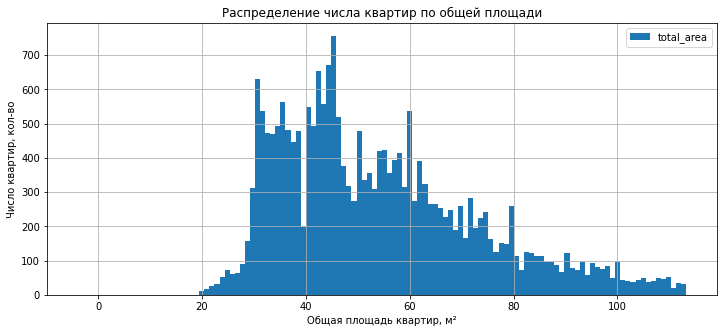

In [46]:
# отсечём выбросы правилом 1.5 IQR (любое значение данных, которое находится на 1.5 IQR 
# значений ниже Q1 или выше Q3, является выбросом).

data['total_area'].hist(bins=120, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по общей площади')
plt.xlabel('Общая площадь квартир, м²')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с общей площадью 43-46 м².    

#### Жилая площадь квартир.

Опишем данные жилой площади квартиры.

In [47]:
# вывод описания данных с помощью функции describe()
data['living_area'].describe()

count    23463.000000
mean        34.093664
std         19.716575
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

Вычислим Q1, Q3 и IQR жилой площади квартир.

In [48]:
# рассчёт Q1, Q3 и IQR
q1 = data['living_area'].quantile(.25)
q3 = data['living_area'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным жилой площади квартиры.

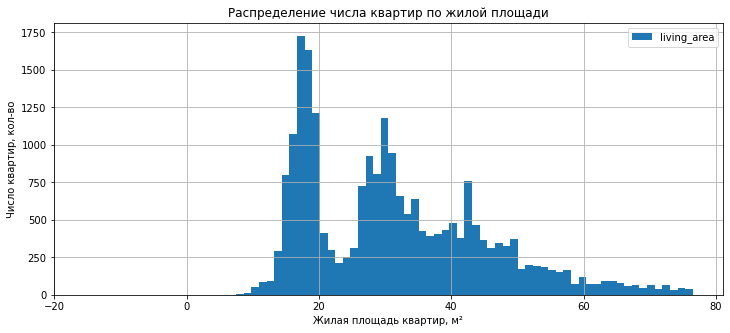

In [49]:
# отсечём выбросы правилом 1.5 IQR

data['living_area'].hist(bins=80, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по жилой площади')
plt.xlabel('Жилая площадь квартир, м²')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с жилой площадью 17-19 и 28 м².  

#### Площадь кухни.

Опишем данные площади кухни.

In [50]:
# вывод описания данных с помощью функции describe()
data['kitchen_area'].describe()

count    23463.000000
mean        10.418234
std          5.664742
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Вычислим Q1, Q3 и IQR площади кухни.

In [51]:
# рассчёт Q1, Q3 и IQR
q1 = data['kitchen_area'].quantile(.25)
q3 = data['kitchen_area'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным площади кухни.

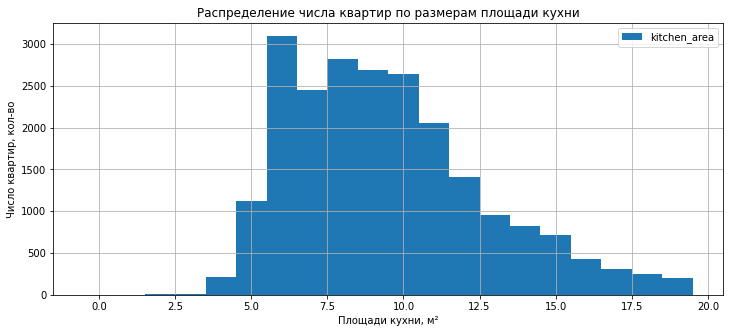

In [52]:
# отсечём выбросы правилом 1.5 IQR

data['kitchen_area'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по размерам площади кухни')
plt.xlabel('Площади кухни, м²')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с площадью кухни 6 и 8 м².  

#### Цена объекта.

Опишем данные цены объекта.

In [53]:
# вывод описания данных с помощью функции describe()
data['last_price'].describe()

count    2.346300e+04
mean     6.305352e+06
std      7.782506e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.610000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [54]:
# деление значений столбца на 1 млн. для удобного восприятия
dlt_bln = data['last_price']/10**6

Вычислим Q1, Q3 и IQR цены объекта.

In [55]:
# рассчёт Q1, Q3 и IQR
q1 = dlt_bln.quantile(.25)
q3 = dlt_bln.quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным цены объекта.

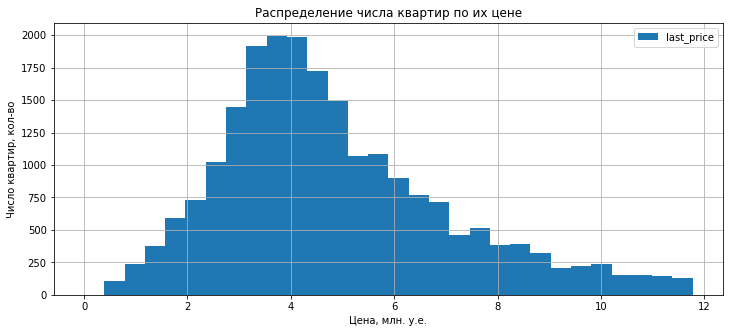

In [56]:
# отсечём выбросы правилом 1.5 IQR

dlt_bln.hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по их цене')
plt.xlabel('Цена, млн. у.е.')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир со стоимостью 3,0-4,2 млн.  

#### Количество комнат.

Опишем данные количества комнат.

In [57]:
# вывод описания данных с помощью функции describe()
data['rooms'].describe()

count    23463.000000
mean         2.058944
std          1.035049
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

Вычислим Q1, Q3 и IQR количества комнат.

In [58]:
# рассчёт Q1, Q3 и IQR
q1 = data['rooms'].quantile(.25)
q3 = data['rooms'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным количества комнат.

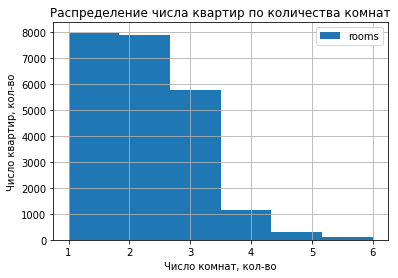

In [59]:
# отсечём выбросы правилом 1.5 IQR

data['rooms'].hist(bins=6, range=(1, (q3 + 1.5 * iqr)), legend=True)
plt.title('Распределение числа квартир по количества комнат')
plt.xlabel('Число комнат, кол-во')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено 1-2-комнатных квартир, с увеличением числа комнат предложение снижается.  

#### Высота потолков.

Опишем данные высоты потолков.

In [60]:
# вывод описания данных с помощью функции describe()
data['ceiling_height'].describe()

count    23463.000000
mean         2.695389
std          0.217546
min          1.750000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

In [61]:
data['ceiling_height'].sort_values(ascending=False).head(30)

20064    6.00
21017    5.80
7510     5.50
12503    5.30
460      5.20
1041     5.00
21705    4.90
2778     4.80
18959    4.70
1286     4.70
14373    4.50
13091    4.50
2799     4.50
6738     4.50
9692     4.50
10059    4.50
3040     4.50
7454     4.45
6665     4.40
7209     4.40
11531    4.40
4164     4.37
10644    4.30
16908    4.25
6837     4.20
11015    4.20
14471    4.20
18860    4.20
2819     4.20
20664    4.20
Name: ceiling_height, dtype: float64

Вычислим Q1, Q3 и IQR высоты потолков.

In [62]:
# рассчёт Q1, Q3 и IQR
q1 = data['ceiling_height'].quantile(.25)
q3 = data['ceiling_height'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным высоты потолков.

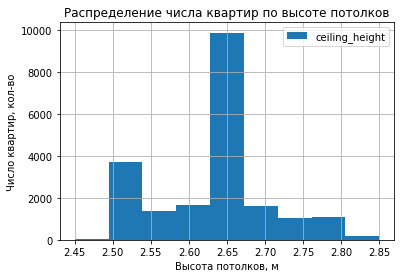

In [63]:
# отсечём выбросы правилом 1.5 IQR

data['ceiling_height'].hist(bins=9, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), legend=True)
plt.title('Распределение числа квартир по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с высотой потолков 2,63-2,67 м, также много предложений квартир с высотой потолков 2,5 м. 

#### Тип этажа квартиры («первый», «последний», «другой»).

Опишем данные типа этажа квартиры.

In [64]:
# вывод описания данных с помощью функции describe()
data['floor_type'].describe()

count      23463
unique         3
top       другой
freq       17276
Name: floor_type, dtype: object

Построим гистограмму по данным типа этажа квартиры.

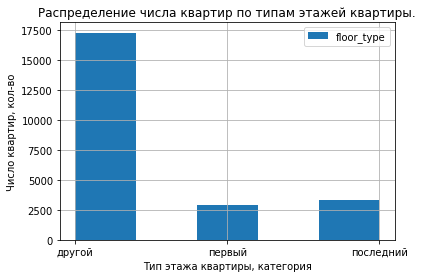

In [65]:
# 
data['floor_type'].hist(bins=5, legend=True)
plt.title('Распределение числа квартир по типам этажей квартиры.')
plt.xlabel('Тип этажа квартиры, категория')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир ни на первом, ни на последнем этажах.

#### Общее количество этажей в доме.

Опишем данные общего количества этажей в доме.

In [66]:
# вывод описания данных с помощью функции describe()
data['floors_total'].describe()

count    23463.000000
mean        10.691386
std          6.596885
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Вычислим Q1, Q3 и IQR общего количества этажей в доме.

In [67]:
# рассчёт Q1, Q3 и IQR
q1 = data['floors_total'].quantile(.25)
q3 = data['floors_total'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным общего количества этажей в доме.

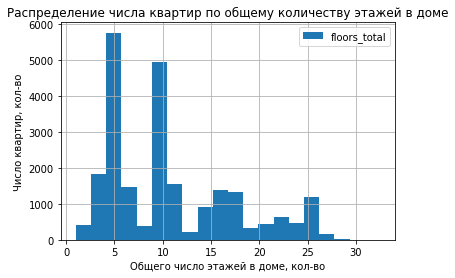

In [68]:
# отсечём выбросы правилом 1.5 IQR

data['floors_total'].hist(bins=20, range=(1, (q3 + 1.5 * iqr)), legend=True)
plt.title('Распределение числа квартир по общему количеству этажей в доме')
plt.xlabel('Общего число этажей в доме, кол-во')
plt.ylabel('Число квартир, кол-во')

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир в 5 и 9-этажных домах. 

#### Расстояние до центра города в метрах.

Опишем данные расстояние от объекта до центра города в метрах.

In [69]:
# вывод описания данных с помощью функции describe()
data['city_centers_nearest'].describe()

count    17972.000000
mean     14220.008625
std       8610.191200
min        181.000000
25%       9289.000000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Вычислим Q1, Q3 и IQR расстояния от объекта до центра города в метрах.

In [70]:
# рассчёт Q1, Q3 и IQR
q1 = data['city_centers_nearest'].quantile(.25)
q3 = data['city_centers_nearest'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по данным расстояния от объекта до центра города в метрах.

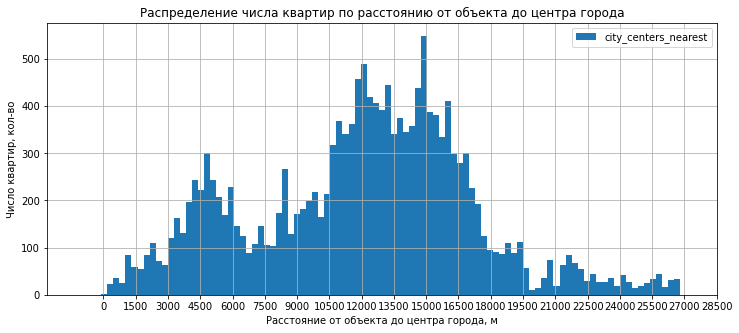

In [71]:
# отсечём выбросы правилом 1.5 IQR

data['city_centers_nearest'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по расстоянию от объекта до центра города')
plt.xlabel('Расстояние от объекта до центра города, м')
plt.ylabel('Число квартир, кол-во')
plt.xticks(np.arange(0, 30000, 1500))

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с расстоянием до центра города: 11 000 - 16 000 м. 

#### Расстояние до ближайшего парка.

Опишем данные расстояния до ближайшего парка.

In [72]:
# вывод описания данных с помощью функции describe()
data['parks_nearest'].describe()

count    7974.000000
mean      490.811262
std       341.858788
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Вычислим Q1, Q3 и IQR расстояния до ближайшего парка.

In [73]:
# рассчёт Q1, Q3 и IQR
q1 = data['parks_nearest'].quantile(.25)
q3 = data['parks_nearest'].quantile(.75)
iqr = q3 - q1

Построим гистограмму по расстоянию до ближайшего парка.

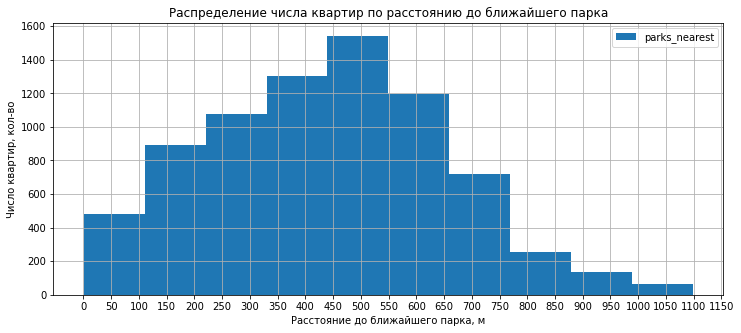

In [74]:
# отсечём выбросы правилом 1.5 IQR

data['parks_nearest'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Число квартир, кол-во')
plt.xticks(np.arange(0, 1200, 50))

plt.show()

**Вывод:**
    Больше всего на продажу выставлено квартир с расстоянием до ближайшего парка 340-650 м. 

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

### Изучим, как быстро продавались квартиры.

Опишем данные, как быстро продавались квартиры.

In [75]:
# вывод описания данных с помощью функции describe()
data['days_exposition'].describe()

count    20306.000000
mean       180.538511
std        219.400096
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вычислим Q1, Q3 и IQR быстроты продажи квартир.

In [76]:
# рассчёт Q1, Q3 и IQR
q1 = data['days_exposition'].quantile(.25)
q3 = data['days_exposition'].quantile(.75)
iqr = q3 - q1

#### Построим гистограмму по быстроте продажи квартир.

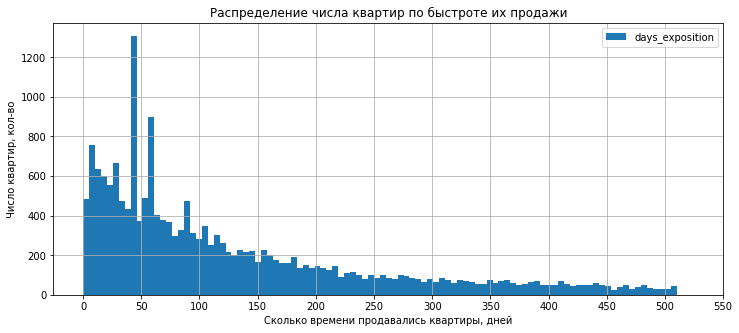

In [77]:
# отсечём выбросы правилом 1.5 IQR

data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по быстроте их продажи')
plt.xlabel('Сколько времени продавались квартиры, дней')
plt.ylabel('Число квартир, кол-во')
plt.xticks(np.arange(0, 600, 50))

plt.show()

У гистограммы слишком большой шлейф, срежем его:

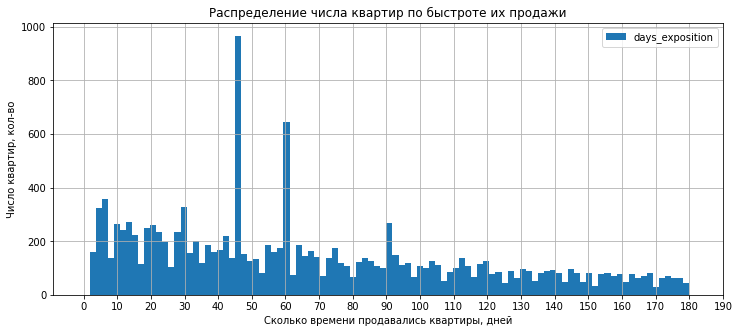

In [78]:
data['days_exposition'].hist(bins=100, range=(0, 180), figsize=(12,5), legend=True)
plt.title('Распределение числа квартир по быстроте их продажи')
plt.xlabel('Сколько времени продавались квартиры, дней')
plt.ylabel('Число квартир, кол-во')
plt.xticks(np.arange(0, 200, 10))

plt.show()

**Вывод:**
Более всего квартиры продавались через 45, 60 дней после публикации объявления.

#### Посчитаем среднее и медиану быстроты продажи квартир

In [79]:
# вычисление и округление среднего значения с помощью функции mean() и round() 
days_exposition_mean = data['days_exposition'].mean().round()
print(f'Среднее число дней продажи квартир: {days_exposition_mean}.')

Среднее число дней продажи квартир: 181.0.


In [80]:
# вычисление медианного значения с помощью функции median()
days_exposition_median = data['days_exposition'].median()
print(f'Медианное число дней продажи квартир: {days_exposition_median}.')

Медианное число дней продажи квартир: 95.0.


Определим выше какого значения начинаются выбросы.

In [81]:
# вывод величины после, которой начинаются выбросы.
top_ejection = q3 + 1.5 * iqr
print(f'Выбросы начинаются после {top_ejection} дней продажи.')

Выбросы начинаются после 510.0 дней продажи.


Построим диаграмму размаха быстроты продажи квартир.

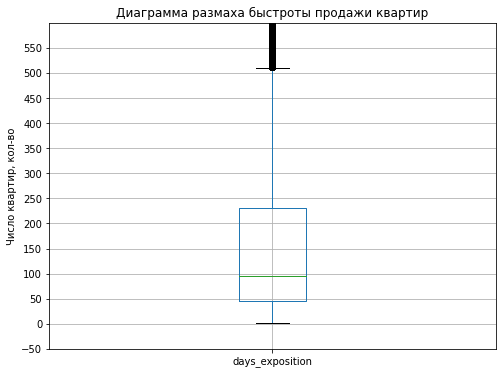

In [82]:
# построение диаграммы размаха с помощью метода boxplot 
data.boxplot(column='days_exposition', figsize=(8,6))
plt.title('Диаграмма размаха быстроты продажи квартир')
plt.ylabel('Число квартир, кол-во')
plt.yticks(np.arange(-50, 600, 50))
plt.ylim(-50, 600)

plt.show()

**Вывод:**
- Обычно продажа занимает - 45 - 231 день.
- Быстрые продажи - до 45 дней. 
- Необычно долгие - более 510 дней. 

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

#### Зависимость стоимости объекта от его общей площади.

Построим диаграмму рассеяния стоимости объекта в зависимости от его общей площади.

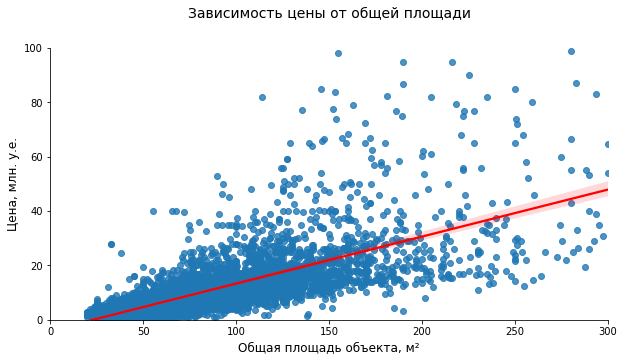

Коэффициент корреляции Пирсона составляет: 0.68


In [83]:
# создание диаграммы рассеяния с линией регрессии, показывающей тенденцию в данных
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='total_area', y='last_price', data=data, line_kws={'color':'red'}, fit_reg=True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 100*10**6])
plt.xlabel('Общая площадь объекта, м²', fontsize=12)
plt.ylabel('Цена, млн. у.е.', fontsize=12)
plt.title('Зависимость цены от общей площади', fontsize=14, pad=30) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
sns.despine()
plt.show()

corr = data['last_price'].corr(data['total_area'], method='pearson', min_periods=None)
print('Коэффициент корреляции Пирсона составляет: {:.2}'.format(corr))

Зависимость цены от общей площади квартиры - заметная, положительная: чем больше общая площадь квартиры, тем она дороже. 

#### Зависимость стоимости объекта от его жилой площади.

Построим диаграмму рассеяния стоимости объекта в зависимости от его жилой площади.

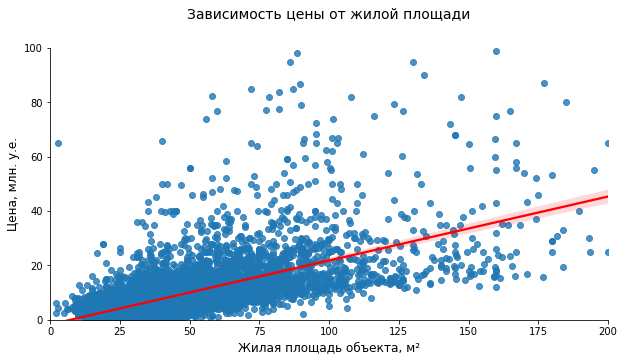

Коэффициент корреляции Пирсона составляет: 0.6


In [84]:
# создание диаграммы рассеяния с линией регрессии, показывающей тенденцию в данных
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='living_area', y='last_price', data=data, line_kws={'color':'red'}, fit_reg=True)
ax.set_xlim([0, 200])
ax.set_ylim([0, 100*10**6])
plt.xlabel('Жилая площадь объекта, м²', fontsize=12)
plt.ylabel('Цена, млн. у.е.', fontsize=12)
plt.title('Зависимость цены от жилой площади', fontsize=14, pad=30) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
sns.despine()
plt.show()

corr = data['last_price'].corr(data['living_area'], method='pearson', min_periods=None)
print('Коэффициент корреляции Пирсона составляет: {:.2}'.format(corr))

Зависимость цены от общей площади квартиры - заметная, положительная: чем больше жилая площадь квартиры, тем она дороже. 

#### Зависимость стоимости объекта от площади его кухни.

Построим диаграмму рассеяния стоимости объекта в зависимости от площади его кухни.

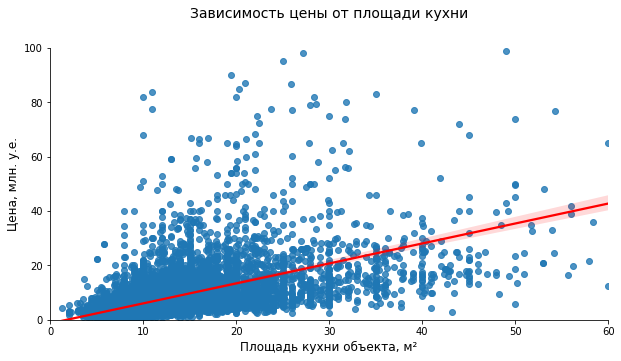

Коэффициент корреляции Пирсона составляет: 0.53


In [85]:
# создание диаграммы рассеяния с линией регрессии, показывающей тенденцию в данных
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='kitchen_area', y='last_price', data=data, line_kws={'color':'red'}, fit_reg=True)
ax.set_xlim([0, 60])
ax.set_ylim([0, 100*10**6])
plt.xlabel('Площадь кухни объекта, м²', fontsize=12)
plt.ylabel('Цена, млн. у.е.', fontsize=12)
plt.title('Зависимость цены от площади кухни', fontsize=14, pad=30) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
sns.despine()
plt.show()

corr = data['last_price'].corr(data['kitchen_area'], method='pearson', min_periods=None)
print('Коэффициент корреляции Пирсона составляет: {:.2}'.format(corr))

Зависимость цены от общей площади кухни - заметная, положительная: чем больше площадь кухни, тем она дороже. 

#### Зависимость стоимости объекта от количества комнат в нём. 

Построим диаграмму размаха цены в зависимости от количества комнат.   

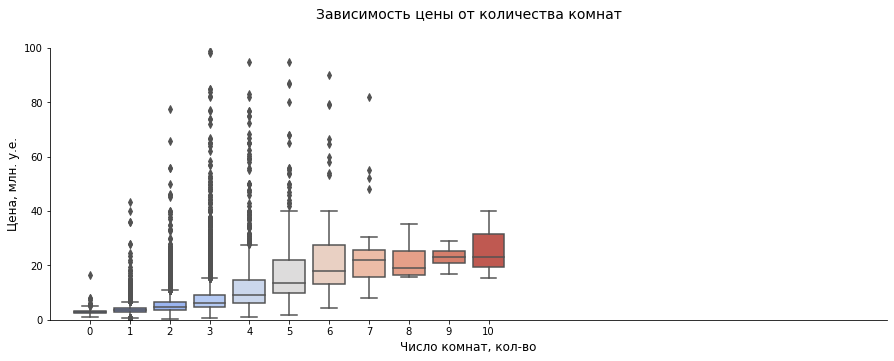

Коэффициент корреляции Пирсона составляет: 0.39


In [86]:
# построение диаграммы размаха с помощью метода boxplot 
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='rooms', y='last_price', data=data, palette='coolwarm')
ax.set_xlim([-1, 20])
ax.set_ylim([0, 100*10**6])
plt.xlabel('Число комнат, кол-во', fontsize=12)
plt.ylabel('Цена, млн. у.е.', fontsize=12)
plt.title('Зависимость цены от количества комнат', fontsize=14, pad=30) 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
sns.despine()
plt.show()

corr = data['last_price'].corr(data['rooms'], method='pearson', min_periods=None)
print('Коэффициент корреляции Пирсона составляет: {:.2}'.format(corr))

**Вывод:**
Зависимость цены от числа комнат в квартире - умеренная, положительная: чем больше комнат в квартире, тем она дороже, что чётко прослеживается от 1 до 7 комнат в квартире, но, когда 8 комнат и более - линейной зависимости не наблюдается. 

#### Зависимость стоимости объекта от этажа, на котором он расположен.

Выведем таблицу зависимости медианной стоимости объекта от типа этажа, на котором он расположен.

In [87]:
# вывод таблицы зависимости медианной цены от типа этажа с помощью функции  display() 
display(pd.DataFrame(data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price')
.reset_index().rename(columns={'floor_type':'Этаж','last_price':'Медианная цена'})))

,Этаж,Медианная цена
0,первый,3900000
1,последний,4300000
2,другой,4821500


Построим диаграмму рассеяния стоимости объекта в зависимости от этажа, на котором он расположен.

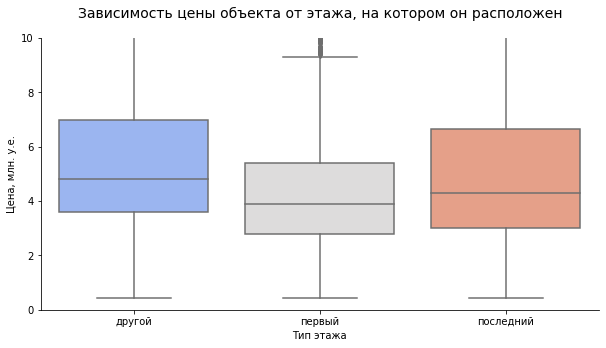

In [88]:
# построение диаграммы размаха цены в зависимости от этажа с помощью метода boxplot 
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='floor_type', y='last_price', data=data, palette='coolwarm')
ax.set_ylim([0, 10*10**6])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн. у.е.')
plt.title('Зависимость цены объекта от этажа, на котором он расположен', fontsize=14, pad=20)
sns.despine()
plt.show()

Наиболее дорогая цена у квартир на других этажах и последнем, за квартиры на первом этаже самая низкая цена.  

#### Зависимость стоимости объекта от даты размещения объявления о его продаже.

##### Зависимость стоимости объекта от дня недели размещения объявления о его продаже.

Выведем таблицу зависимости медианной стоимости объекта от дня недели размещения объявления о его продаже.

In [89]:
# вывод таблицы зависимости медианной цены от дня недели с помощью функции  display() 
display(pd.DataFrame(data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
             .reset_index().rename(columns={'weekday_exposition':'день недели','last_price':'медианная цена'})))


,день недели,медианная цена
0,0,4650000
1,1,4700000
2,2,4700000
3,3,4620000
4,4,4550000
5,5,4540000
6,6,4530000


Построим диаграмму рассеяния стоимости объекта от дня недели размещения объявления о его продаже.

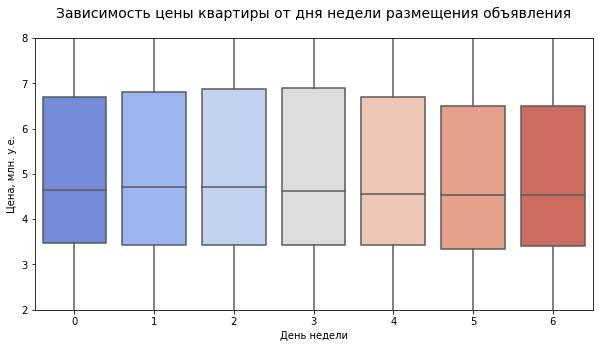

In [90]:
# построение диаграммы размаха цены в зависимости от дня недели размещения объявления с помощью метода boxplot 
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='weekday_exposition', y='last_price', data=data, palette='coolwarm')
ax.set_ylim([2*10**6, 8*10**6])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
plt.xlabel('День недели')
plt.ylabel('Цена, млн. у.е.')
plt.title('Зависимость цены квартиры от дня недели размещения объявления', fontsize=14, pad=20)
plt.show()

**Вывод**: Зависимость стоимости объекта от дня недели размещения объявления отсутствует.

 ##### Зависимость стоимости объекта от месяца размещения объявления о его продаже. 

Выведем таблицу зависимости медианной стоимости объекта от месяца размещения объявления о его продаже.

In [91]:
# вывод таблицы зависимости медианной цены от месяца с помощью функции  display() 
display(pd.DataFrame(data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
             .reset_index().rename(columns={'month_exposition':'месяц','last_price':'медианная цена'})))


,месяц,медианная цена
0,1,4600000
1,2,4650000
2,3,4650000
3,4,4800000
4,5,4500000
5,6,4400000
6,7,4600000
7,8,4580000
8,9,4700000
9,10,4550000


Построим диаграмму рассеяния стоимости объекта от месяца размещения объявления о его продаже.

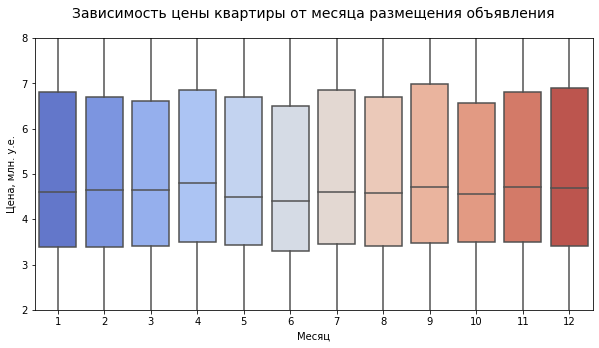

In [92]:
# построение диаграммы размаха цены в зависимости от месяца размещения объявления с помощью метода boxplot 
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='month_exposition', y='last_price', data=data, palette='coolwarm')
ax.set_ylim([2*10**6, 8*10**6])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
plt.xlabel('Месяц')
plt.ylabel('Цена, млн. у.е.')
plt.title('Зависимость цены квартиры от месяца размещения объявления', fontsize=14, pad=20)
plt.show()

**Вывод:** Зависимость стоимости объекта от месяца размещения объявления отсутствует.

##### Зависимость стоимости объекта от года размещения объявления о его продаже.

Выведем таблицу зависимости медианной стоимости объекта от года размещения объявления о его продаже.

In [93]:
# вывод таблицы зависимости медианной цены от года с помощью функции  display() 
display(pd.DataFrame(data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
             .reset_index().rename(columns={'year_exposition':'год','last_price':'медианная цена'})))

,год,медианная цена
0,2014,7640000
1,2015,5300000
2,2016,4500000
3,2017,4500000
4,2018,4550000
5,2019,5050000


Построим диаграмму рассеяния стоимости объекта от года размещения объявления о его продаже.

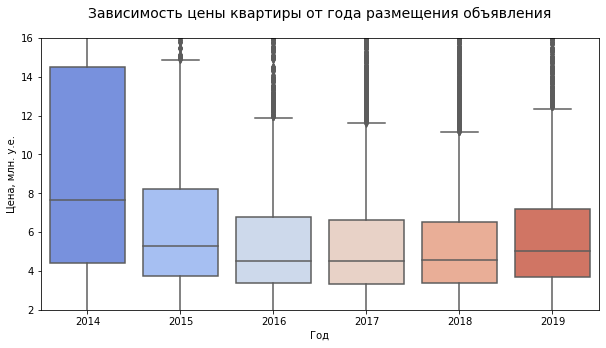

In [94]:
# построение диаграммы размаха цены в зависимости от года размещения объявления с помощью метода boxplot 
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='year_exposition', y='last_price', data=data, palette='coolwarm')
ax.set_ylim([2*10**6, 16*10**6])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
plt.xlabel('Год')
plt.ylabel('Цена, млн. у.е.')
plt.title('Зависимость цены квартиры от года размещения объявления', fontsize=14, pad=20)
plt.show()

**Вывод:** Медианная цена в 2014 году самая высокая, в остальные годы она различается не сильно.

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

#### Постром сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [95]:
# вывод сводной таблицы с количеством объявлений и средней ценой квадратного метра
count_ads_mean_price_sqm = data.pivot_table(index = 'locality_rename',values = 'price_square_meter', aggfunc = ['count','sum'])
count_ads_mean_price_sqm.columns = ['Количество объявлений', 'Суммарная цена квадратного метра'] 
count_ads_mean_price_sqm['Средняя цена квадратного метра'] = \
count_ads_mean_price_sqm['Суммарная цена квадратного метра']/count_ads_mean_price_sqm['Количество объявлений']
count_ads_mean_price_sqm = count_ads_mean_price_sqm.sort_values(by = 'Количество объявлений', ascending = False)
count_ads_mean_price_sqm_10 = count_ads_mean_price_sqm.iloc[:10]
count_ads_mean_price_sqm_10

,Количество объявлений,Суммарная цена квадратного метра,Средняя цена квадратного метра
locality_rename,,,
санкт-петербург,15564,1.779745e+09,114350.080793
поселок мурино,552,4.726752e+07,85629.568641
поселок шушары,438,3.439581e+07,78529.235183
всеволожск,398,2.732448e+07,68654.473970
пушкин,366,3.772946e+07,103085.949180
колпино,337,2.538732e+07,75333.295816
поселок парголово,327,2.948752e+07,90175.913089
гатчина,307,2.110507e+07,68746.146515
село кудрово,299,2.764959e+07,92473.547559


#### Выделим среди них населённые пункты с самой высокой и низкой стоимостью квадратного метра жилья.

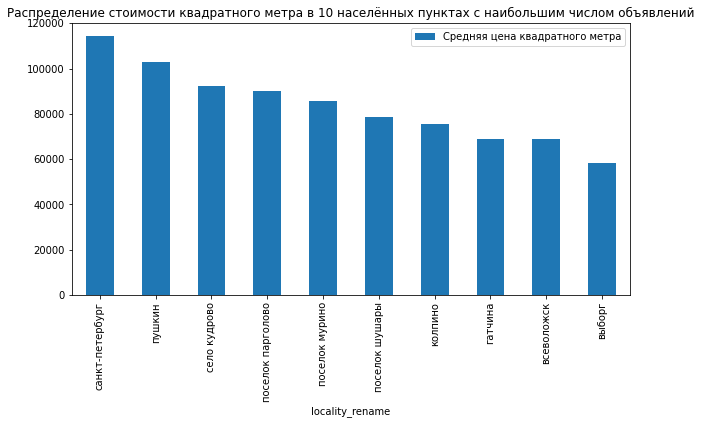

In [96]:
# вывод столбчатого графика населенных пунктов по стоимости квадратного метра жилья методом plot и pivot_table   
count_ads_mean_price_sqm_10.pivot_table(index = 'locality_rename', values = 'Средняя цена квадратного метра')\
.sort_values(by = 'Средняя цена квадратного метра', ascending = False)\
.plot(y = 'Средняя цена квадратного метра', kind = 'bar',\
      title='Распределение стоимости квадратного метра в 10 населённых пунктах с наибольшим числом объявлений',\
     figsize=(10,5));

**Вывод:** 
Самая высокая стоимость квадратного метра жилья в Санкт-Петербурге - 114 869, и самая низкая - в Выборге 58 142.

### Зависимость средней цены объекта от расстояния до центра Санкт-Петербурга.

#### Вычислим среднюю стоимость квартир на разном удалении от центра.

In [97]:
# создание среза по городу Санкт-Петербург
spb = data.query('locality_rename == "санкт-петербург"')
# вывод сводной таблицы средних цен квартир и удаленности от центра города
spb_t = spb.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = ['mean']).round()
spb_t.columns = ['Средняя цена квартир']
spb_t.head(10)

,Средняя цена квартир
city_centers_nearest_km,
0.0,31449116.0
1.0,20895938.0
2.0,16065743.0
3.0,10654981.0
4.0,11881097.0
5.0,12644492.0
6.0,14309043.0
7.0,14339733.0
8.0,9133416.0


#### Построим график изменения средней цены для каждого километра от центра Санкт-Петербурга.

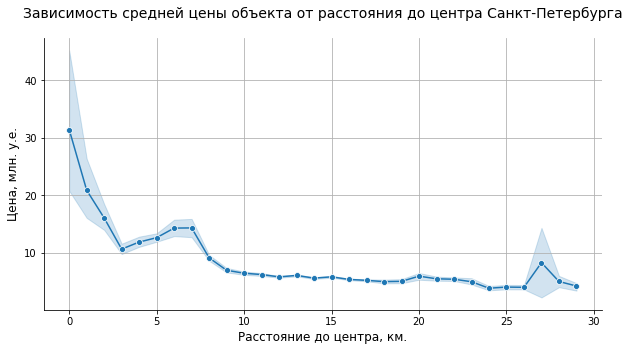

In [98]:
# построение линейного графика изменения средней цены для каждого километра методом lineplot библиотеки seaborn  
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='city_centers_nearest_km', y='last_price', data=spb, estimator='mean', marker='o')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.0f}'.format(x/10**6)))
plt.xlabel('Расстояние до центра, км.', fontsize=12)
plt.ylabel('Цена, млн. у.е.', fontsize=12)
plt.title('Зависимость средней цены объекта от расстояния до центра Санкт-Петербурга', fontsize=14, pad=20)
sns.despine()
plt.grid()
plt.show()

**Вывод:**
До 10 км видна четкая зависимость стоимости объектов от расстояния до центра города, далее зависимость еле заметная. 

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

## Напишите общий вывод

1. Исследован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

2. Проведена предобработка массива данных: по возможности пропуски заполнены релевантными данными, исправлены аномальные значения, устранены неявные дубликаты, преобразованы типы данных. 

3. Для выполнения задач исследования добавлены новые столбцы.  

4. В результате изучения выяснено:
    - больше всего на продажу выставлено квартир:
        - с общей площадью 43-46 м²;
        - с жилой площадью 17-19 и 28 м²;
        - с площадью кухни 6 и 8 м²;
        - со стоимостью 3,0-4,2 млн;
        - 1-2-комнатных квартир;
        - с высотой потолков 2,63-2,67 м и 2,5 м;
        - на других этажах - ни на первом, ни на последнем;
        - в 5 и 9-этажных домах;
        - с расстоянием до центра города: 11 000 - 16 000 м;
        - с расстоянием до ближайшего парка 340-650 м.


    - скорей всего квартиры продаются через 45, 60 дней после публикации объявления;

    - больше всего положительно влияют на общую стоимость объекта:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - числа комнат в квартире;
        - расположение на других этажах и последнем, но не на первом;
        - расположение до 10 км от центра города.

    - дата размещения объявления не влияет на стоимость квартиры;

     - из 10 городов с самым большим числом объявлений самая высокая стоимость 1 м² жилья в Санкт-Петербурге - 114 869, и самая низкая - в Выборге 58 142.

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.

[К началу проекта](#Откройте-файл-с-данными-и-изучите-общую-информацию)